In [310]:
from telethon import TelegramClient
from telethon import connection
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nest_asyncio
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob

%precision %.4f

nltk.download('punkt')
nltk.download('stopwords')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /home/pavel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/pavel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
nest_asyncio.apply()
api_id = ''
api_hash = ''
channel_name = 'aimylogic'

In [65]:
client = TelegramClient("session", api_id=api_id, api_hash=api_hash)

### Соберем все сообщения:

In [70]:
async def get_messages(name):
    await client.start()
    
    channel = await client.get_entity(name)
    data = []
    async for message in client.iter_messages(channel, limit=None):
        data.append([message.date, message.message])

    df = pd.DataFrame(data, columns=["date", "message"])
    df.to_csv("aimylogic_messages.csv", index=False)
    await client.disconnect()

In [71]:
async with client:
    client.loop.run_until_complete(get_messages(channel_name))

In [157]:
df = pd.read_csv("aimylogic_messages.csv")

In [158]:
df

,date,message
0,2024-06-08 06:06:58+00:00,Идеально - если есть реальная задача и вы ее п...
1,2024-06-08 05:46:30+00:00,"Добрый день коллеги, кто нибудь подскажет с че..."
2,2024-06-07 20:39:55+00:00,NaN
3,2024-06-07 18:27:50+00:00,"Всем добрый вечер, подскажите что за ошибки 40..."
4,2024-06-07 17:38:23+00:00,спасибо поробую
...,...,...
53931,2018-05-25 18:59:52+00:00,NaN
53932,2018-05-25 18:59:52+00:00,"Прикиньте, даже на телефоне сервис работает"
53933,2018-05-25 18:40:02+00:00,NaN
53934,2018-05-25 18:14:16+00:00,Хелло


In [159]:
df.describe()

,date,message
count,53936,46927
unique,53519,44046
top,2020-01-20 07:33:43+00:00,Спасибо
freq,8,216


In [160]:
df["date"] = pd.to_datetime(df["date"])

In [161]:
df = df.dropna(ignore_index=True)

In [162]:
df

,date,message
0,2024-06-08 06:06:58+00:00,Идеально - если есть реальная задача и вы ее п...
1,2024-06-08 05:46:30+00:00,"Добрый день коллеги, кто нибудь подскажет с че..."
2,2024-06-07 18:27:50+00:00,"Всем добрый вечер, подскажите что за ошибки 40..."
3,2024-06-07 17:38:23+00:00,спасибо поробую
4,2024-06-07 17:37:38+00:00,$metraz <= 10
...,...,...
46922,2018-05-29 06:26:45+00:00,Сейчас сайт доступен
46923,2018-05-29 05:48:55+00:00,Достаточно быстро среагировали. +
46924,2018-05-29 05:47:58+00:00,"Святослав, спасибо за фидбек, разберёмся, отпи..."
46925,2018-05-25 18:59:52+00:00,"Прикиньте, даже на телефоне сервис работает"


# Частота сообщений по годам и месяцам

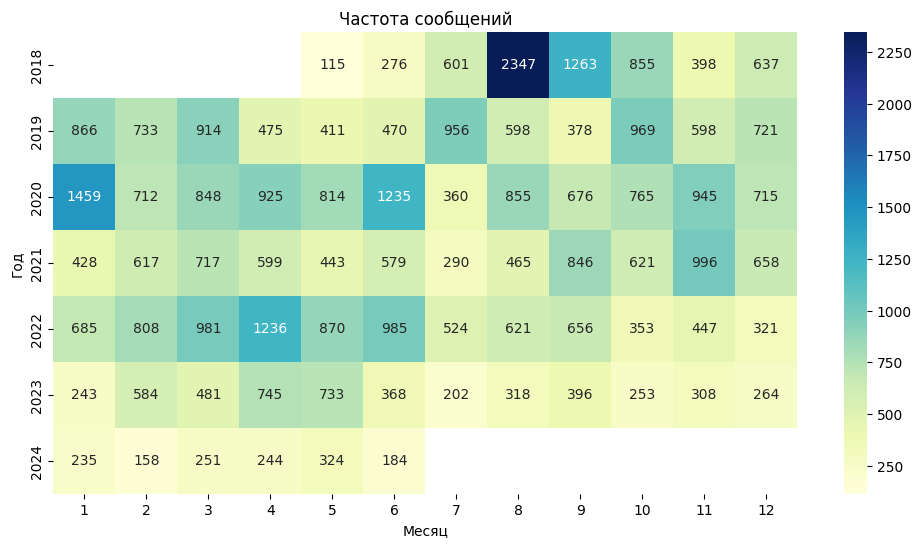

In [180]:
messages_per_month = df.groupby([df["date"].dt.year, df["date"].dt.month]).size().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(messages_per_month, annot=True, cmap="YlGnBu", fmt="g")
plt.title("Частота сообщений")
plt.xlabel("Месяц")
plt.ylabel("Год")
plt.show()


Наибольшее число сообщений (2347) было на четвертый месяц создания канала. В целом, первые несколько лет частота сообщений была достаточно высокой, а самые низкие показатели зафиксированы за последний год - как правило не более 300 сообщений в месяц. Это может быть связано с тем, что при выходе продукта на рынок у потребителей возникают вопросы по использованию, на которые надо отвечать. Также пики на графике могут свидетельствовать о выходе обновлений и добавлении нового функционала.

# Самые популярные слова в сообщениях

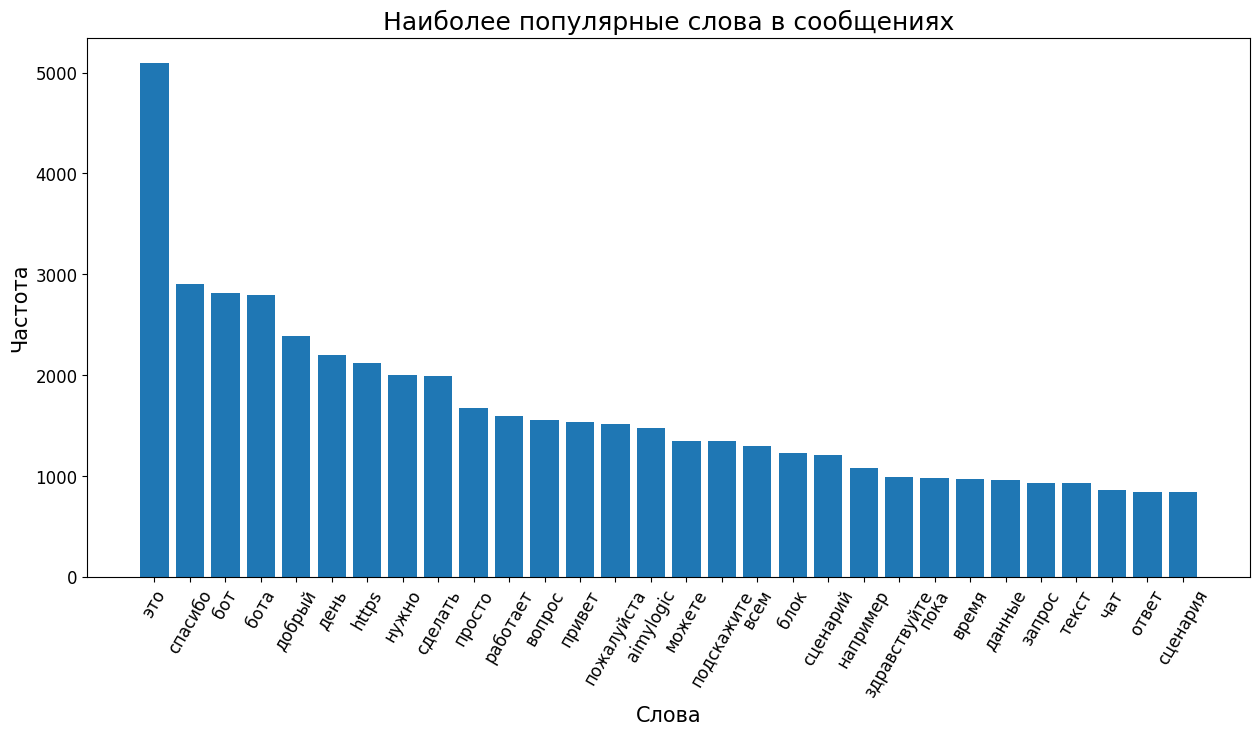

In [230]:
all_messages = ' '.join(df['message'])

words = word_tokenize(all_messages.lower())

filtered_words = [word for word in words if word.isalpha() and word not in stop_words]

word_counts = Counter(filtered_words)

common_words = word_counts.most_common(30)

words, counts = zip(*common_words)

plt.figure(figsize=(15, 7))
plt.bar(words, counts)
plt.title("Наиболее популярные слова в сообщениях", fontsize=18)
plt.xlabel("Слова", fontsize=15)
plt.ylabel("Частота", fontsize=15)
plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)
plt.xticks(rotation=60)
plt.show()

И в разрезе по годам, исключив слово "это":

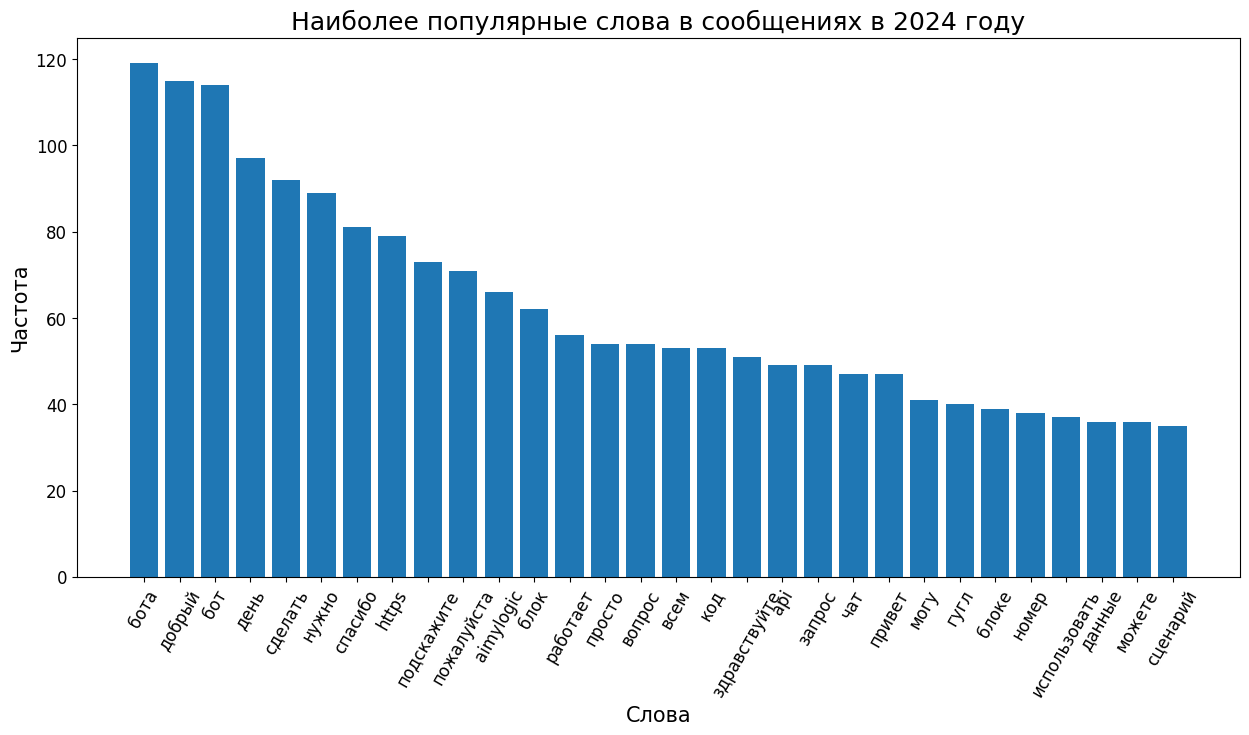

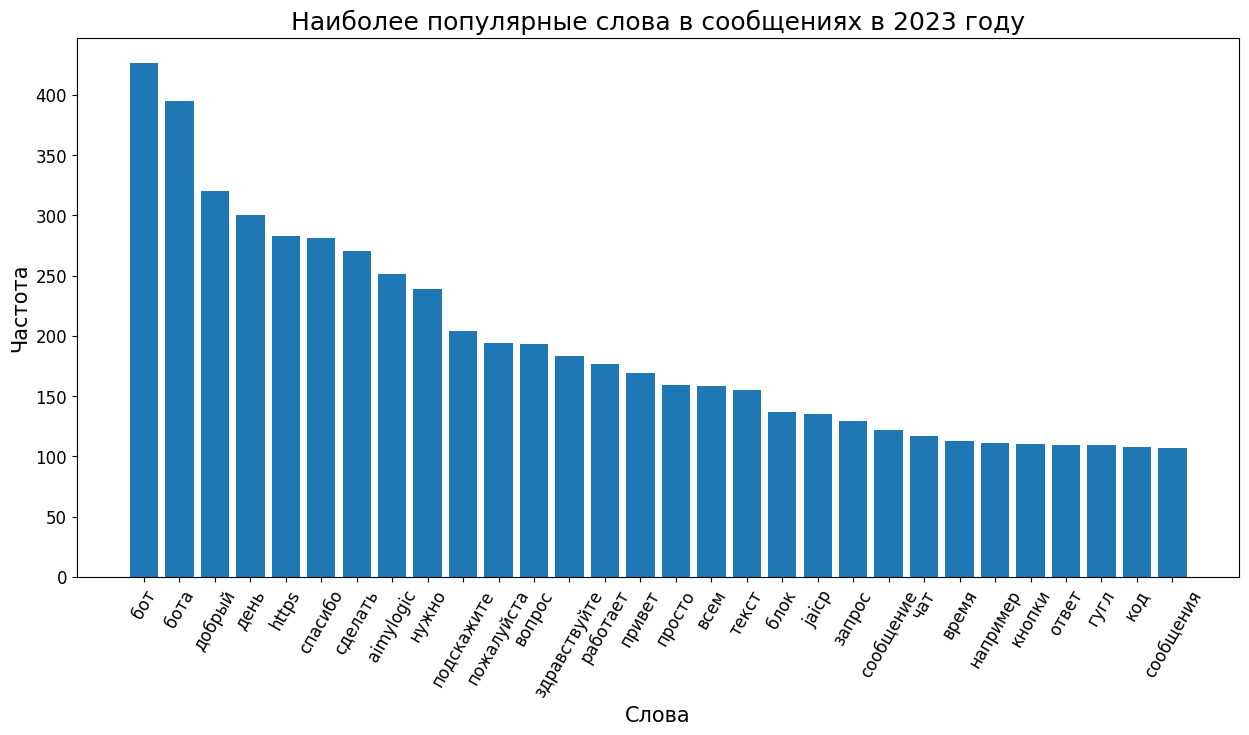

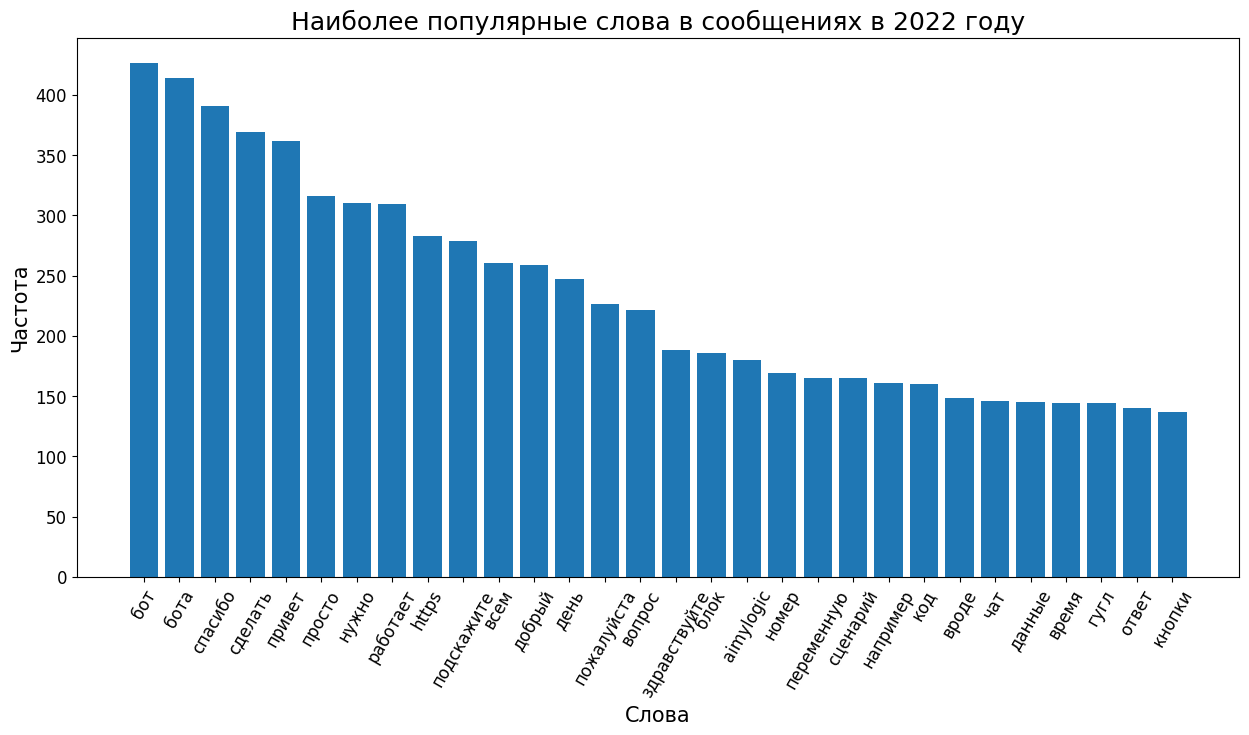

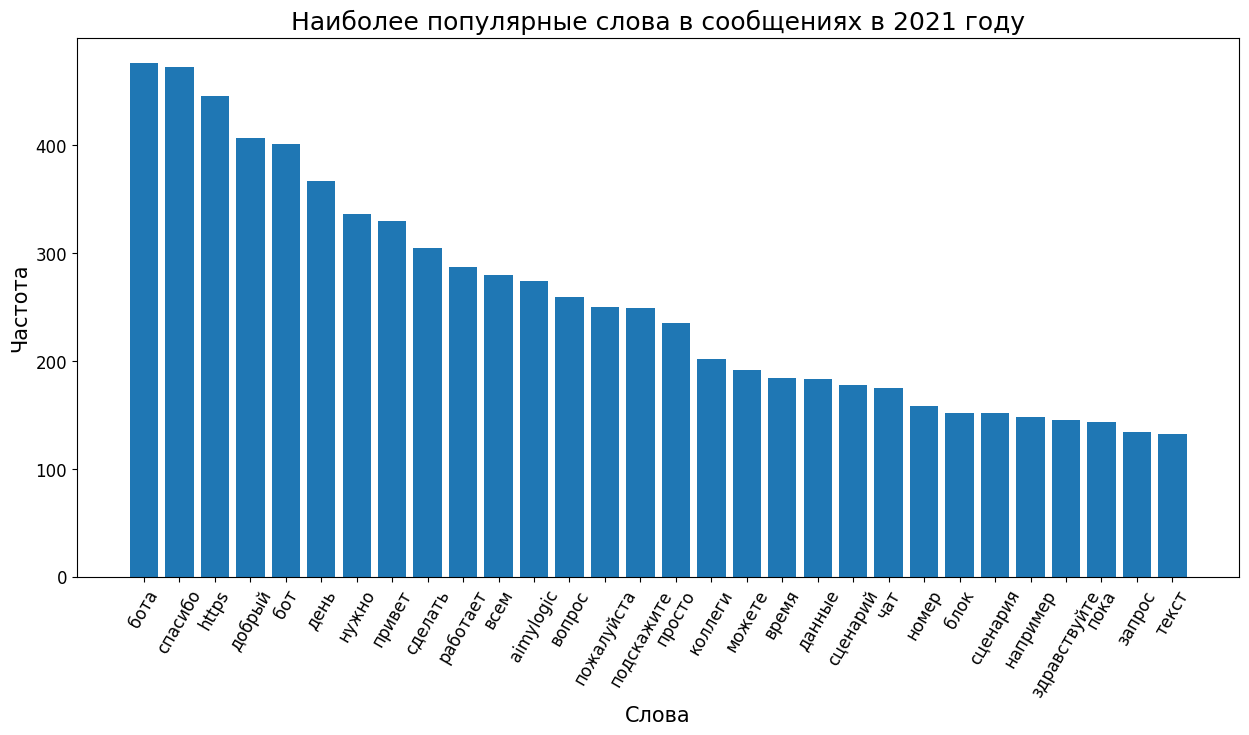

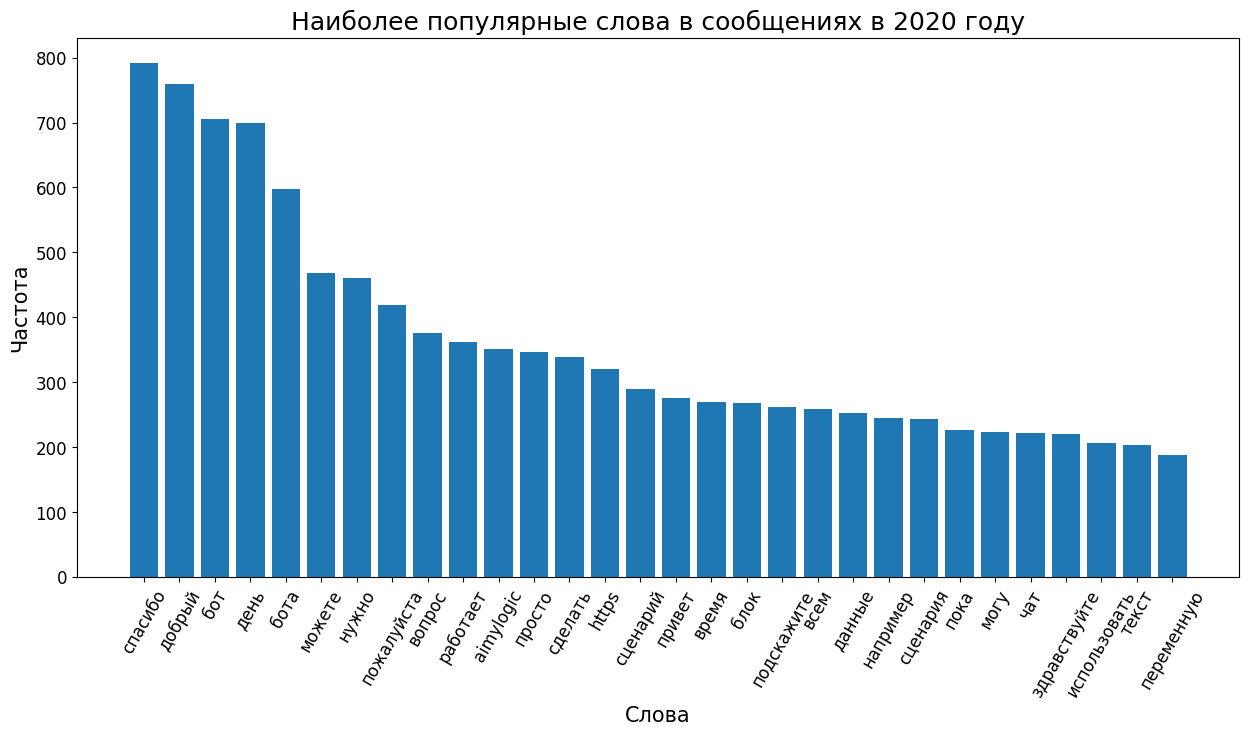

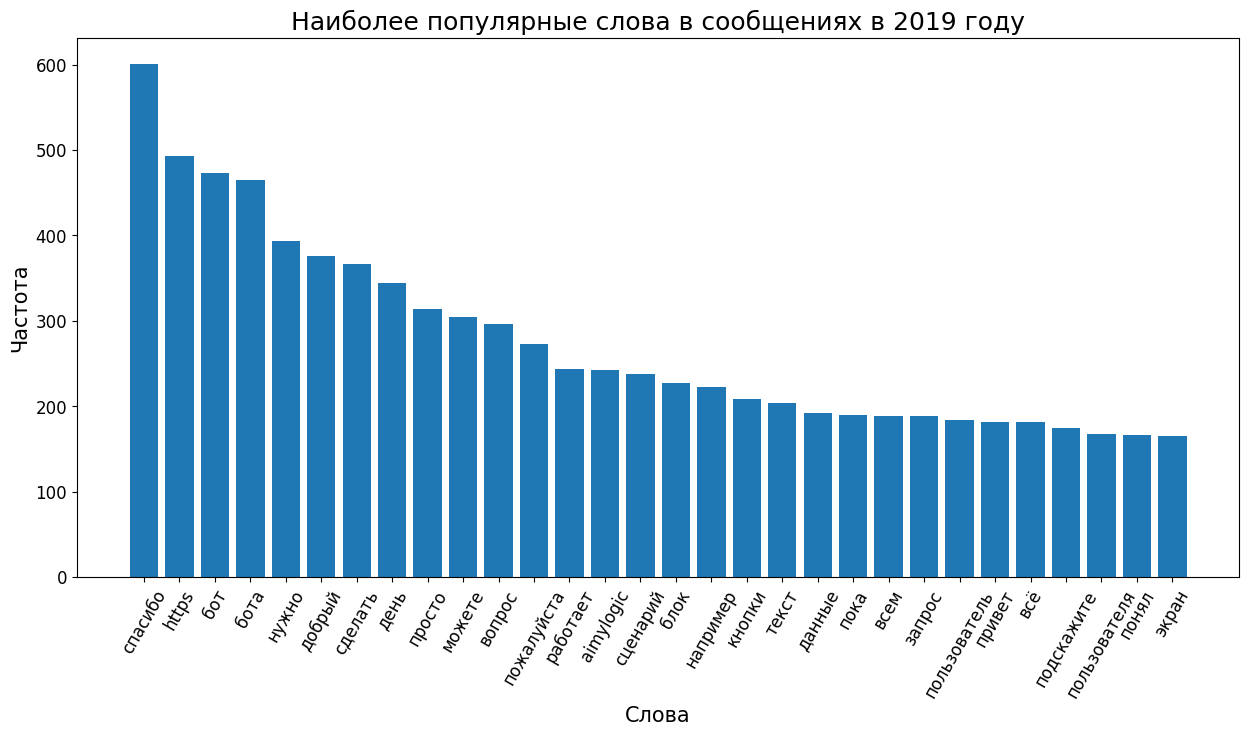

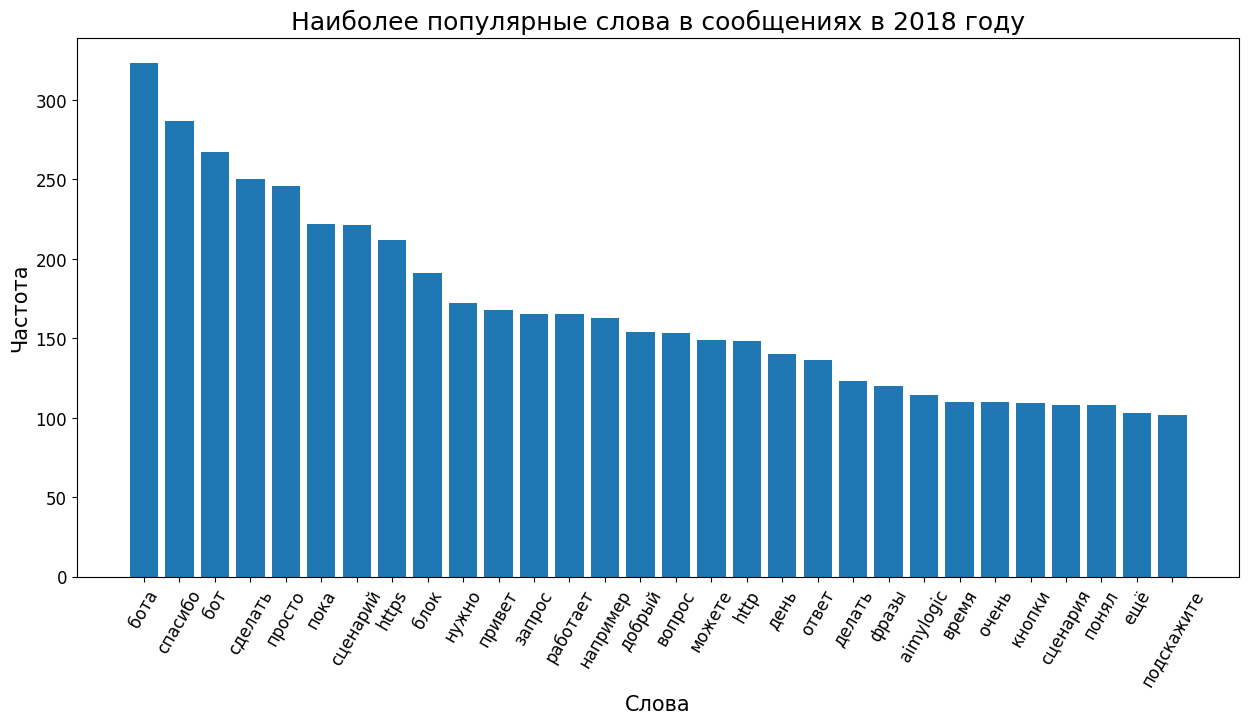

In [231]:
words_in_years = []
for year in df["date"].dt.year.unique():
    

    all_messages = ' '.join(df['message'][df["date"].dt.year == year])

    words = word_tokenize(all_messages.lower())

    filtered_words = [word for word in words if word.isalpha() and word != "это" and word not in stop_words]

    word_counts = Counter(filtered_words)

    common_words_year = word_counts.most_common(30)

    words_year, counts_year = zip(*common_words_year)
    words_in_years.append(list(words_year))

    plt.figure(figsize=(15, 7))
    plt.bar(words_year, counts_year)
    plt.title(f"Наиболее популярные слова в сообщениях в {year} году", fontsize=18)
    plt.xlabel("Слова", fontsize=15)
    plt.ylabel("Частота", fontsize=15)
    plt.tick_params(axis="x", labelsize=12)
    plt.tick_params(axis="y", labelsize=12)
    plt.xticks(rotation=60)
    plt.show()

И пересечение самых популярных слов по годам:

In [237]:
res = set(words_in_years[0])
for i in words_in_years[1:]:
    res = res & set(i)
res = list(res)

In [238]:
len(res)

15

In [239]:
res

['работает',
 'привет',
 'блок',
 'подскажите',
 'aimylogic',
 'вопрос',
 'https',
 'сделать',
 'бота',
 'нужно',
 'день',
 'добрый',
 'бот',
 'просто',
 'спасибо']

Семантически ключевые слова сообщений связаны с тематикой канала. Пользователи задают вопросы по созданию ботов, упоминается название продукта. Часто сообщения содержат ссылки.

# Средняя длина сообщений

In [306]:
df["message_length"] = df["message"].apply(len)

In [307]:
daily_message_length = df.groupby(df["date"].dt.date)["message_length"].mean()

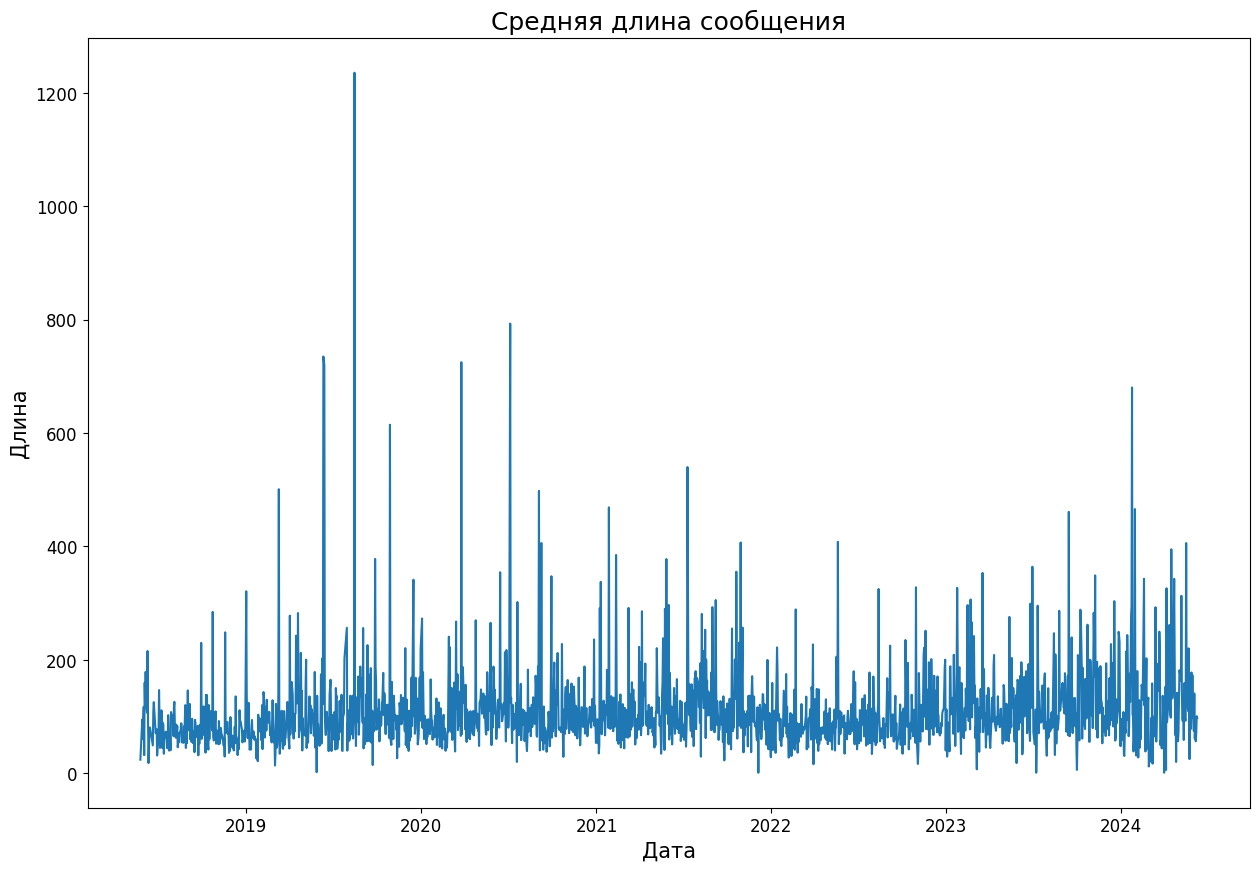

In [336]:
plt.figure(figsize=(15,10))
daily_message_length.plot()
plt.title("Средняя длина сообщения", fontsize=18)
plt.xlabel("Дата", fontsize=15)
plt.ylabel("Длина", fontsize=15)
plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)
plt.show()

In [333]:
print(f"Средняя длина сообщений за все время составляет {round(daily_message_length.mean(), 3)} символов.")

Средняя длина сообщений за все время составляет 108.654 символов.


Самые большие пики на графике наблюдаются в первые четыре года, причем постепенно нарастая и достигая макисмума в 2019 году. Вероятно, это связано с тем, что изначально вопросы по продукту были более глубокие и требовали более детальных ответов.

Посмтрим на 5 самых длинных сообщений:

In [327]:
top_5_longest_messages = df.nlargest(5, "message_length")[["date", "message_length", "message"]]

In [332]:
num = 1
for mes in top_5_longest_messages["message"]:
    print(f"№{num}")
    print(mes)
    print("\n")
    num += 1

№1
ge-base.sc:146:5 Inconsistent indents.src/default-knowledge-base.sc:146:5 Inconsistent indents.src/defaul

t-knowledge-base.sc:153:1 Line 'Сюда входят скидки и специальные предложения на полезные сервисы для бизнеса: онлайн-бухгалтерии, реклама, конструкторы сайтов, командировки, корпоративная связь, системы управления заявками и многое другое.' does not contain a valid tag name.src/default-knowledge-base.sc:153:1 Line 'Сюда входят скидки и специальные предложения на полезные сервисы для бизнеса: онлайн-бухгалтерии, реклама, конструкторы сайтов, командировки, корпоративная связь, системы управления заявками и многое другое.' does not contain a valid tag name.src/default-knowledge-base.sc:155:1 Line 'Все предложения - https://prostobank.online/bonuses.' does not contain a valid tag name.src/default-knowledge-base.sc:155:1 Line 'Все предложения - https://prostobank.online/bonuses.' does not contain a valid tag name.src/default-knowledge-base.sc:157:1 Line '*Бонусы предоставляются техн

Они представляют из себя вопросы пользователей с текстом возникшей ошибки.

# Тональность сообщений

In [334]:
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df["sentiment"] = df["message"].apply(get_sentiment)
daily_sentiment = df.groupby(df["date"].dt.date)["sentiment"].mean()

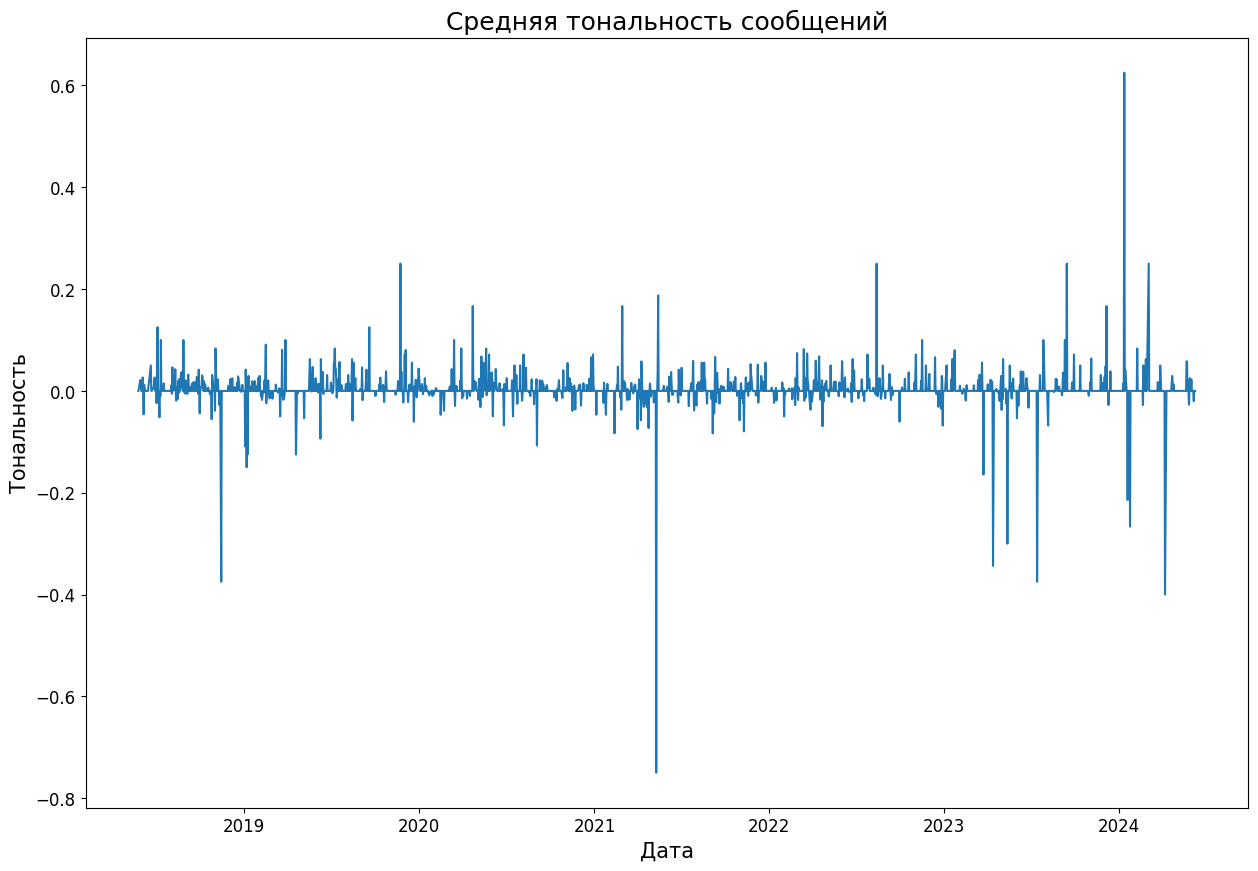

In [335]:
plt.figure(figsize=(15, 10))
daily_sentiment.plot()
plt.title("Средняя тональность сообщений", fontsize=18)
plt.xlabel("Дата", fontsize=15)
plt.ylabel("Тональность", fontsize=15)
plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)
plt.show()

Практически все сообщения нейтральные, поскольку канал посвящен вопросам и поддержке по продукту, а не выражению своего мнения. Однако на графике есть несколько пиков. Рассмторим 5 "негативных" и 5 "позитивных" сообщения.

In [346]:
top_5_positive_messages = df.nlargest(5, "sentiment")[["date", "message"]]
top_5_negative_messages = df.nsmallest(5, "sentiment")[["date", "message"]]

,date,message
7029,2022-11-03 07:56:09+00:00,:D
7744,2022-09-14 14:41:30+00:00,"ну вот да, но я щас починю :D"
9245,2022-06-27 11:30:10+00:00,Спасибо мне... :D
35421,2019-08-08 15:42:50+00:00,Best practice time! Сегодня в меню интеграция ...
35593,2019-08-01 14:02:13+00:00,"Сегодня четверг, а значит пришло время для bes..."


In [354]:
for dat, mes in zip(top_5_positive_messages["date"], top_5_positive_messages["message"]):
    print(dat)
    print(mes)
    print("\n")

2022-11-03 07:56:09+00:00
:D


2022-09-14 14:41:30+00:00
ну вот да, но я щас починю :D


2022-06-27 11:30:10+00:00
Спасибо мне... :D


2019-08-08 15:42:50+00:00
Best practice time! Сегодня в меню интеграция Aimylogic с MailChimp, веб-сервисом для создания почтовых рассылок и кампаний, в котором можно управлять списками, добавлять новых абонентов и просматривать отчеты. 📬
Зачем эта интеграция нужна? 👉 Если вам приходится часто делать рассылки по email-адресам ваших клиентов, то этот процесс можно полностью автоматизировать с помощью бота на Aimylogic https://help.aimylogic.com/ru/article/integraciya-s-mailchimp-18z044c/ #полезное #best_practice


2019-08-01 14:02:13+00:00
Сегодня четверг, а значит пришло время для best practice! Рассказываем об интеграции Aimylogic и Chatbase, бесплатным сервисом для анализа чатботов. С его помощью можно анализировать ключевые показатели эффективности бота. Итак, разбираем пошагово! https://help.aimylogic.com/ru/article/integraciya-s-chatbase-1dfxn93/ #

### :D

In [355]:
for dat, mes in zip(top_5_negative_messages["date"], top_5_negative_messages["message"]):
    print(dat)
    print(mes)
    print("\n")

2020-11-22 18:21:30+00:00
Помогло решение $hour = ($hour == null) ? "0" : $hour @andreienz спасибо тебе большое !


2021-02-26 10:19:10+00:00
Через JS, чтобы не отправлять много запросов
1. Вводится число $num
2. Рассчитывается остаток от деления на 10
$ost = $num % 10
3. Рассчитывается остаток от деления на 100
$sto = $num % 100
4. Получается склонение в зависимости от числа
$mes = ($ost == 1)&&($sto !== 11) ?"бутылка" : ($ost >= 2 && $ost <= 4)&&($sto < 12 || $sto > 14) ? "бутылки" : ($ost >= 5 && $ost <=9) ? "бутылок" : "бутылок"


2024-01-24 14:27:05+00:00
Это мы поняли, а как refresh (обновляемый) token закладывать на место base token? С хэдером Authorization Bearer [refresh token] не работает. 

Пробовали по этому найду идти (нужен VPN):

https://medium.com/@amanpal2072004/how-to-generate-refresh-token-and-use-them-to-access-google-api-f7565413c548#:~:text=Go%20to%20https%3A%2F%2Fdevelopers,Client%20ID%20and%20Client%20Secret.


2024-05-26 10:43:20+00:00
Я все прослоупочил :(


2

"Негативные" сообщения не несут в себе отрицательного эмоционального окраса. Скорее всего они были определены как "негативные" из-за небуквенных символов.